Ex.1

In [6]:
import pandas as pd 
df = pd.read_csv(r'/Users/admin/Desktop/python/di-bootcamp/week8/day2/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

How many positive and negative cases is there ?

In [7]:
positive_cases = df[df['Outcome'] == 1].shape[0]
negative_cases = df[df['Outcome'] == 0].shape[0]

print(f"Positive cases: {positive_cases}")
print(f"Negative cases: {negative_cases}")

Positive cases: 268
Negative cases: 500


Split the data into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train - {X_train.shape}, y_train - {y_train.shape}")
print(f"Testing set shape: X_test - {X_test.shape}, y_test - {y_test.shape}")


Training set shape: X_train - (614, 8), y_train - (614,)
Testing set shape: X_test - (154, 8), y_test - (154,)


Ex.2

Which classification model can we use in this problem and why ?

For a binary classification problem like predicting diabetes, several classification models can be used. Commonly used models include logistic regression, decision trees, random forests, support vector machines (SVM), k-nearest neighbors (KNN). The choice of the model depends on various factors, including the size and complexity of the dataset, interpretability of the model, and computational resources available.

Here are a few models and reasons why they might be suitable:

Logistic Regression:

Logistic Regression is a simple and interpretable linear model that works well for binary classification problems. It's a good starting point and can provide insights into the importance of features.

Support Vector Machines (SVM):

SVMs are effective in high-dimensional spaces and can handle non-linear relationships through the kernel trick. They work well when there is a clear margin of separation between classes.

K-Nearest Neighbors (KNN):

KNN is a non-parametric and instance-based algorithm. It can capture complex relationships and doesn't make strong assumptions about the data distribution. However, it might be sensitive to the scale of features.

Decision Tree and Random Forest:

Decision Trees are easy to understand and interpret. Random Forest, an ensemble of Decision Trees, can handle complex relationships and is less prone to overfitting.

Do we need to standardize the data ? If yes, use .StandardScaler()

It's recommended to standardize features for SVMs since they are sensitive to the scale of input features. Therefore,we can use StandardScaler for SVM:

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Create a pipeline with StandardScaler and SVM
model_svm = make_pipeline(StandardScaler(), SVC())

# Fit the model on training data
model_svm.fit(X_train, y_train)

# Make predictions on the test set
predictions_svm = model_svm.predict(X_test)


Ex.3

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a pipeline with StandardScaler and Logistic Regression
model_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Fit the model on training data
model_lr.fit(X_train, y_train)

# Make predictions on the test set
predictions_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions_lr)
conf_matrix = confusion_matrix(y_test, predictions_lr)
classification_rep = classification_report(y_test, predictions_lr)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.7532

Confusion Matrix:
[[79 20]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Ex.4

Accuracy: 0.7532


/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_20459/3129088215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues')


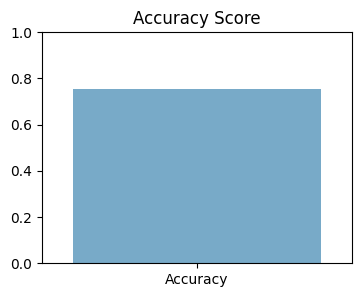

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracy score
accuracy = accuracy_score(y_test, predictions_lr)
print(f"Accuracy: {accuracy:.4f}")
plt.figure(figsize=(4, 3))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues')
plt.ylim(0, 1)
plt.title('Accuracy Score')
plt.show()

The Logistic Regression model achieved an accuracy of 75.32% on the test set. This indicates that the model correctly predicted the diabetes status for approximately 75.32% of instances. While accuracy provides a general overview of performance, it's crucial to consider other metrics like precision, recall, and F1-score, especially in cases of imbalanced datasets. Further evaluation using these metrics will provide a more comprehensive understanding of the model's effectiveness in predicting diabetes.

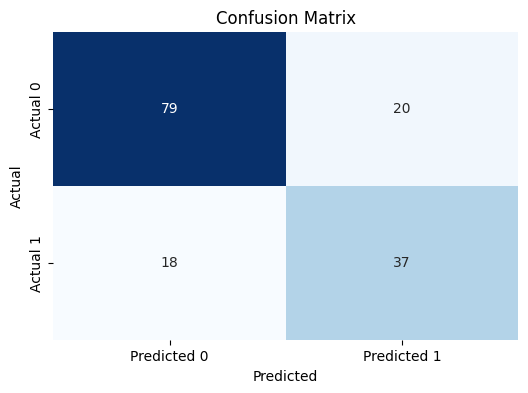

In [14]:
#Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True Positives (TP): The model correctly identified 37 individuals with diabetes. This is a crucial aspect in the context of predicting diabetes, and the higher this number, the better.

True Negatives (TN): The model correctly identified 79 individuals without diabetes. This is also important, as correctly identifying those without the condition contributes to the overall effectiveness of the model.

False Positives (FP): The model incorrectly predicted 20 individuals as having diabetes when they did not. This is a type I error and may be a concern, especially if you want to minimize false alarms or unnecessary treatments.

False Negatives (FN): The model incorrectly predicted 18 individuals as not having diabetes when they did. This is a type II error and can be concerning, especially if missing positive cases is a significant issue.

In summary, the confusion matrix provides a detailed breakdown of the model's performance, helping understand how well it identifies positive and negative cases. Further analysis, such as precision, recall, and F1-score, can offer additional insights into the model's overall effectiveness.

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_20459/559064175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


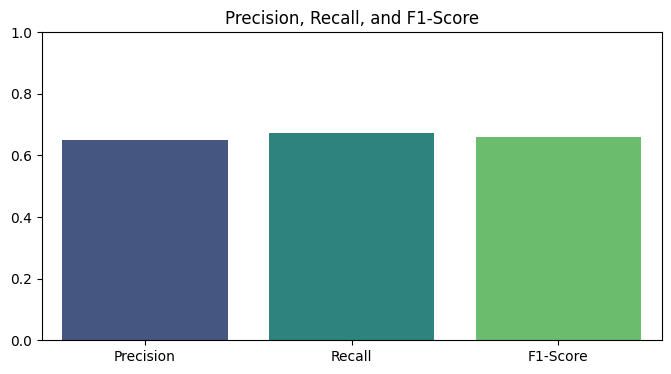

In [17]:
#Plot the Recall, precision, F1-score
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score for Class 1
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions_lr, average='binary')

labels = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]

plt.figure(figsize=(8, 4))
sns.barplot(x=labels, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1-Score for Class 1')
plt.show()


The results:
Class 0 (No Diabetes):

Precision (0.81): Out of all instances predicted as class 0 (no diabetes), 81% were correctly predicted.
Recall (0.80): Out of all actual instances of class 0, the model correctly identified 80%.
F1-Score (0.81): The harmonic mean of precision and recall for class 0 is 81%. It balances precision and recall.
Class 1 (Diabetes):

Precision (0.65): Out of all instances predicted as class 1 (diabetes), 65% were correctly predicted.
Recall (0.67): Out of all actual instances of class 1, the model correctly identified 67%.
F1-Score (0.66): The harmonic mean of precision and recall for class 1 is 66%.

Class 0 (No Diabetes): The model has relatively high precision and recall for predicting instances without diabetes. This indicates that when it predicts no diabetes, it is often correct, and it identifies a large proportion of actual instances without diabetes.

Class 1 (Diabetes): The precision and recall for predicting instances with diabetes are slightly lower, indicating that there is room for improvement, especially in correctly identifying individuals with diabetes.

Ex.5

Accuracy: 0.7662


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


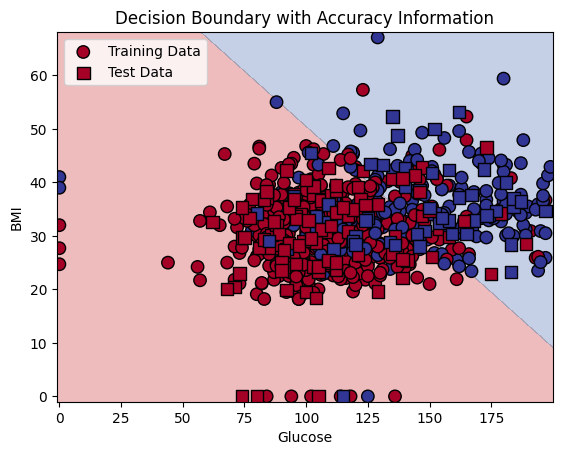

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_subset = X_train[['Glucose', 'BMI']]
X_test_subset = X_test[['Glucose', 'BMI']]

# Train a Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_subset, y_train)

# Make predictions on the test set
predictions_lr = model_lr.predict(X_test_subset)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, predictions_lr)
print(f"Accuracy: {accuracy:.4f}")

# Create a meshgrid to cover the feature space
x_min, x_max = X_train_subset.iloc[:, 0].min() - 1, X_train_subset.iloc[:, 0].max() + 1
y_min, y_max = X_train_subset.iloc[:, 1].min() - 1, X_train_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the labels for each point in the meshgrid
Z = model_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', s=80, label='Training Data')
plt.scatter(X_test_subset.iloc[:, 0], X_test_subset.iloc[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k', marker='s', s=80, label='Test Data')

plt.title('Decision Boundary with Accuracy Information')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()


Ex.6

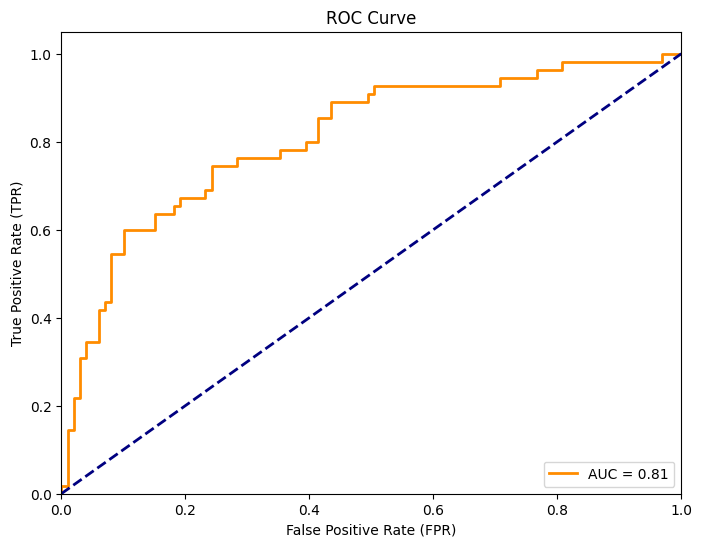

In [25]:
from sklearn.metrics import roc_curve, auc

X_train_subset = X_train[['Glucose', 'BMI']]
X_test_subset = X_test[['Glucose', 'BMI']]

# Train a Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_subset, y_train)

# Make predictions on the test set
probabilities = model_lr.predict_proba(X_test_subset)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()